스케일과 다중공선성의 관계?

한글

In [1]:
from matplotlib import rc, font_manager as fm

# 나눔고딕 폰트 경로 설정
font_path = '../나눔고딕/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트 설정
rc('font', family=font_name)

In [2]:
# 회귀 피처엔지니어링 / 다중공선성 / HeatMap

In [3]:
# 데이터 불러오기
import pandas as pd
df = pd.read_csv('data/for_model_total.csv')
df.drop(columns=['자치구'], inplace=True)
df.head(3)

,월평균_총생활인구수,연령대0_평균,연령대10_평균,연령대20_평균,연령대30_평균,연령대40_평균,연령대50_평균,연령대60_평균,연령대70이상_평균,1인가구,...,연령대_70_거주인구수,연령대_80_거주인구수,연령대_90_거주인구수,유흥주점영업,단란주점,제과점영업,집단급식소,일반음식점,휴게음식점,PET 총량
0,5.892936e+08,3.542718e+07,5.912810e+07,9.170488e+07,1.144680e+08,1.135606e+08,7.744400e+07,5.143368e+07,4.612720e+07,71046,...,32993.833333,11749.000000,2105.083333,2782.0,3645.0,6117.0,5555.0,165890.0,50825.0,2680.0
1,3.672376e+08,2.948711e+07,3.649162e+07,4.277418e+07,5.701898e+07,6.077971e+07,5.486420e+07,4.517363e+07,4.064814e+07,50316,...,27460.583333,9633.416667,1619.916667,1606.0,1097.0,1855.0,3263.0,47030.0,13467.0,2886.3
2,2.147731e+08,1.359185e+07,1.758728e+07,2.864519e+07,2.739157e+07,3.246074e+07,3.419978e+07,2.725101e+07,3.364569e+07,45685,...,27084.000000,11068.083333,1329.916667,864.0,1472.0,932.0,1983.0,43348.0,8292.0,1147.1


In [4]:
pet_column = df.pop('PET 총량')
df.insert(0, 'PET 총량', pet_column)
df.head(3)

,PET 총량,월평균_총생활인구수,연령대0_평균,연령대10_평균,연령대20_평균,연령대30_평균,연령대40_평균,연령대50_평균,연령대60_평균,연령대70이상_평균,...,연령대_60_거주인구수,연령대_70_거주인구수,연령대_80_거주인구수,연령대_90_거주인구수,유흥주점영업,단란주점,제과점영업,집단급식소,일반음식점,휴게음식점
0,2680.0,5.892936e+08,3.542718e+07,5.912810e+07,9.170488e+07,1.144680e+08,1.135606e+08,7.744400e+07,5.143368e+07,4.612720e+07,...,58011.583333,32993.833333,11749.000000,2105.083333,2782.0,3645.0,6117.0,5555.0,165890.0,50825.0
1,2886.3,3.672376e+08,2.948711e+07,3.649162e+07,4.277418e+07,5.701898e+07,6.077971e+07,5.486420e+07,4.517363e+07,4.064814e+07,...,57224.666667,27460.583333,9633.416667,1619.916667,1606.0,1097.0,1855.0,3263.0,47030.0,13467.0
2,1147.1,2.147731e+08,1.359185e+07,1.758728e+07,2.864519e+07,2.739157e+07,3.246074e+07,3.419978e+07,2.725101e+07,3.364569e+07,...,42903.250000,27084.000000,11068.083333,1329.916667,864.0,1472.0,932.0,1983.0,43348.0,8292.0


In [5]:
print(df.columns)
print(len(df.columns))

Index(['PET 총량', '월평균_총생활인구수', '연령대0_평균', '연령대10_평균', '연령대20_평균', '연령대30_평균',
       '연령대40_평균', '연령대50_평균', '연령대60_평균', '연령대70이상_평균', '1인가구', '2인가구',
       '3인가구', '4인가구', '5인가구', '6인가구', '7인 이상 가구', '연령대_100', '연령대_0_거주인구수',
       '연령대_10_거주인구수', '연령대_20_거주인구수', '연령대_30_거주인구수', '연령대_40_거주인구수',
       '연령대_50_거주인구수', '연령대_60_거주인구수', '연령대_70_거주인구수', '연령대_80_거주인구수',
       '연령대_90_거주인구수', '유흥주점영업', '단란주점', '제과점영업', '집단급식소', '일반음식점', '휴게음식점'],
      dtype='object')
34


In [17]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 1~33열까지의 열 선택
selected_columns = df.columns[1:34]

# 선택된 열들을 StandardScaler로 변환
df[selected_columns] = scaler.fit_transform(df[selected_columns])

# 결과 확인
print(df)


    PET 총량  월평균_총생활인구수   연령대0_평균  연령대10_평균  연령대20_평균  연령대30_평균  연령대40_평균  \
0   2680.0    2.813898  1.743167  2.627315  2.760072  3.058261  3.211202   
1   2886.3    0.634268  1.067000  0.823245 -0.208375  0.279971  0.522766   
2   1147.1   -0.862273 -0.742383 -0.683384 -1.065529 -1.152839 -0.919684   
3   1706.3    0.889776  1.145864  0.470115  0.524059  1.004257  0.716346   
4   2877.2    0.642071 -0.236647 -0.097850  2.146724  0.851649  0.181361   
5   1315.5   -0.431255 -0.465776 -0.281039  0.131902 -0.383699 -0.532029   
6   1644.9   -0.230110  0.119873 -0.391883 -0.559545 -0.139253 -0.142455   
7    811.7   -1.403635 -1.371699 -1.351629 -1.260103 -0.984177 -1.183078   
8   1587.0    0.670202  0.968434  1.567121  0.176881 -0.297161  0.334289   
9    771.8   -1.000400 -0.706728 -0.651452 -1.330457 -1.223056 -1.067368   
10  1632.7   -0.510183 -0.594454 -0.503820 -0.048964 -0.671707 -0.682521   
11  1550.2   -0.265962 -0.145547 -0.348617  0.179053 -0.282862 -0.451402   
12  1786.8  

# HeatMap

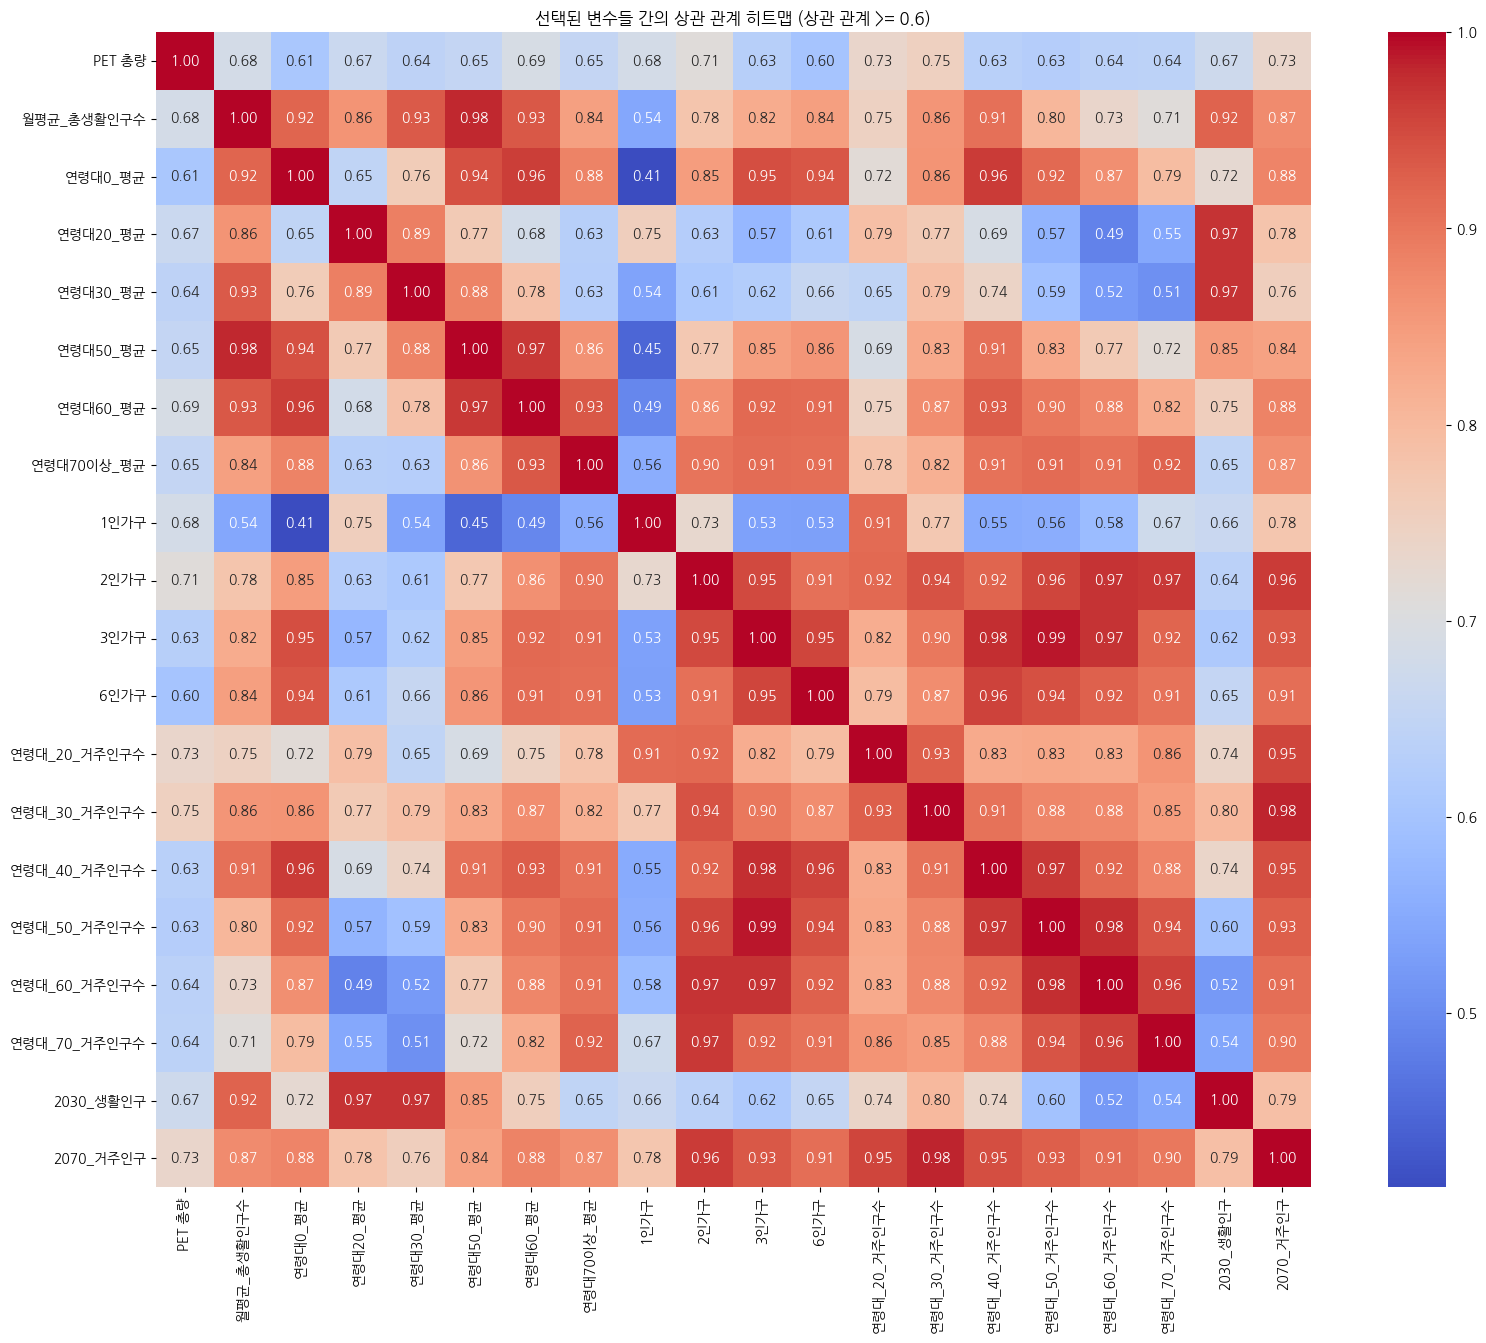

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 'PET 총량' 변수와의 상관 관계가 0.6 이상인 변수
correlation_threshold = 0.6
correlation_with_pet = df.corr()['PET 총량']
selected_variables = [col for col in correlation_with_pet.index if abs(correlation_with_pet[col]) >= correlation_threshold]

# 선택된 변수들 간의 상관 관계 히트맵
df_selected = df[selected_variables]
correlation_matrix = df_selected.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('선택된 변수들 간의 상관 관계 히트맵 (상관 관계 >= 0.6)')
plt.show()

In [9]:
# 다중공선성

In [10]:
# 파생변수만들기

In [11]:
df['2030_생활인구'] = df['연령대20_평균'] + df['연령대30_평균']
df.head(2)

,PET 총량,월평균_총생활인구수,연령대0_평균,연령대10_평균,연령대20_평균,연령대30_평균,연령대40_평균,연령대50_평균,연령대60_평균,연령대70이상_평균,...,연령대_70_거주인구수,연령대_80_거주인구수,연령대_90_거주인구수,유흥주점영업,단란주점,제과점영업,집단급식소,일반음식점,휴게음식점,2030_생활인구
0,2680.0,2.813898,1.743167,2.627315,2.760072,3.058261,3.211202,2.547053,1.908667,1.582102,...,0.986841,0.439612,1.367057,1.995972,3.378879,3.830082,2.895035,3.691282,50825.0,5.818333
1,2886.3,0.634268,1.067000,0.823245,-0.208375,0.279971,0.522766,0.831529,1.276980,0.970642,...,0.244271,-0.334887,0.225352,0.673212,-0.280577,-0.074127,0.314324,-0.465228,13467.0,0.071596


In [12]:
df['2070_거주인구'] = df['연령대_20_거주인구수'] + df['연령대_30_거주인구수'] + df['연령대_40_거주인구수']
+ df['연령대_50_거주인구수'] + df['연령대_60_거주인구수'] + df['연령대_70_거주인구수'] 
df.head(2)

,PET 총량,월평균_총생활인구수,연령대0_평균,연령대10_평균,연령대20_평균,연령대30_평균,연령대40_평균,연령대50_평균,연령대60_평균,연령대70이상_평균,...,연령대_80_거주인구수,연령대_90_거주인구수,유흥주점영업,단란주점,제과점영업,집단급식소,일반음식점,휴게음식점,2030_생활인구,2070_거주인구
0,2680.0,2.813898,1.743167,2.627315,2.760072,3.058261,3.211202,2.547053,1.908667,1.582102,...,0.439612,1.367057,1.995972,3.378879,3.830082,2.895035,3.691282,50825.0,5.818333,4.037425
1,2886.3,0.634268,1.067000,0.823245,-0.208375,0.279971,0.522766,0.831529,1.276980,0.970642,...,-0.334887,0.225352,0.673212,-0.280577,-0.074127,0.314324,-0.465228,13467.0,0.071596,0.970736


In [13]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    # 데이터프레임을 복사하여 본래 데이터를 변경하지 않음
    data_copy = data.copy()
    
    # VIF 데이터프레임 초기화
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data_copy.columns
    vif_data["VIF"] = [variance_inflation_factor(data_copy.values, i) for i in range(data_copy.shape[1])]
    
    return vif_data


In [31]:
# 예시 데이터 생성
# data = df[['2030_생활인구', '1인가구', '2070_거주인구']]

data = df[df.columns[1:25]]
# VIF 계산
vif_result = calculate_vif(data)

print(vif_result)


         Feature           VIF
0     월평균_총생활인구수           inf
1        연령대0_평균           inf
2       연령대10_평균           inf
3       연령대20_평균           inf
4       연령대30_평균           inf
5       연령대40_평균           inf
6       연령대50_평균           inf
7       연령대60_평균           inf
8     연령대70이상_평균           inf
9           1인가구  4.578793e+05
10          2인가구  2.752101e+05
11          3인가구  3.902957e+06
12          4인가구  7.444515e+05
13          5인가구  2.886857e+05
14          6인가구  6.239198e+04
15      7인 이상 가구  6.766135e+01
16       연령대_100  4.856545e+02
17   연령대_0_거주인구수  1.556334e+05
18  연령대_10_거주인구수  1.008453e+05
19  연령대_20_거주인구수  7.421068e+05
20  연령대_30_거주인구수  4.604685e+05
21  연령대_40_거주인구수  1.787198e+06
22  연령대_50_거주인구수  4.619726e+05
23  연령대_60_거주인구수  9.272227e+04


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [15]:
# RFE

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# 예시 데이터 생성 (X는 피처들, y는 타겟 변수)
# X와 y는 실제 데이터로 대체되어야 합니다.
X = df.iloc[:, 1:33]
y = df['PET 총량']

# 모델 정의 (여기서는 선형 회귀 모델 사용)
model = LinearRegression()

# RFE 객체 생성
rfe = RFE(model, n_features_to_select=5)  # 선택할 피처의 개수 지정

# RFE를 사용하여 변수 선택
X_selected = rfe.fit_transform(X, y)

# 선택된 변수의 인덱스 가져오기
selected_indices = rfe.support_

# 원본 데이터에서 선택된 변수의 칼럼명 가져오기
selected_features = X.columns[selected_indices]

print("Selected Features:", selected_features)

Selected Features: Index(['1인가구', '3인가구', '연령대_0_거주인구수', '연령대_20_거주인구수', '연령대_50_거주인구수'], dtype='object')
